In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
from math import sqrt
import scipy

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import svm

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt

In [5]:
credit = pd.read_csv('/Users/sofyanovatskaya/Documents/Study/CreditOneCleanData.csv')
credit.head()

,Unnamed: 0,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,0,20000,0,1,24,2,2,0,0,0,...,689,0,0,0,0,0,0,0,0,1
1,1,120000,0,2,26,0,2,0,0,0,...,1000,1000,1000,0,2000,0,0,0,0,1
2,2,90000,0,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,1,0,0,0,1
3,3,50000,0,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,1,0,0,0,1
4,4,50000,1,1,57,0,0,0,0,0,...,36681,10000,9000,689,679,1,0,0,0,1


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
Unnamed: 0                   30000 non-null int64
LIMIT_BAL                    30000 non-null int64
SEX                          30000 non-null int64
MARRIAGE                     30000 non-null int64
AGE                          30000 non-null int64
PAY_0                        30000 non-null int64
PAY_2                        30000 non-null int64
PAY_3                        30000 non-null int64
PAY_4                        30000 non-null int64
PAY_5                        30000 non-null int64
PAY_6                        30000 non-null int64
BILL_AMT1                    30000 non-null int64
BILL_AMT2                    30000 non-null int64
BILL_AMT3                    30000 non-null int64
BILL_AMT4                    30000 non-null int64
BILL_AMT5                    30000 non-null int64
BILL_AMT6                    30000 non-null int64
PAY_AMT1                     30000 non-nu

In [6]:
credit = credit.drop(['Unnamed: 0', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX'], axis=1)
credit.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0,0,0,1
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,1
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,1
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1,0,0,0,1


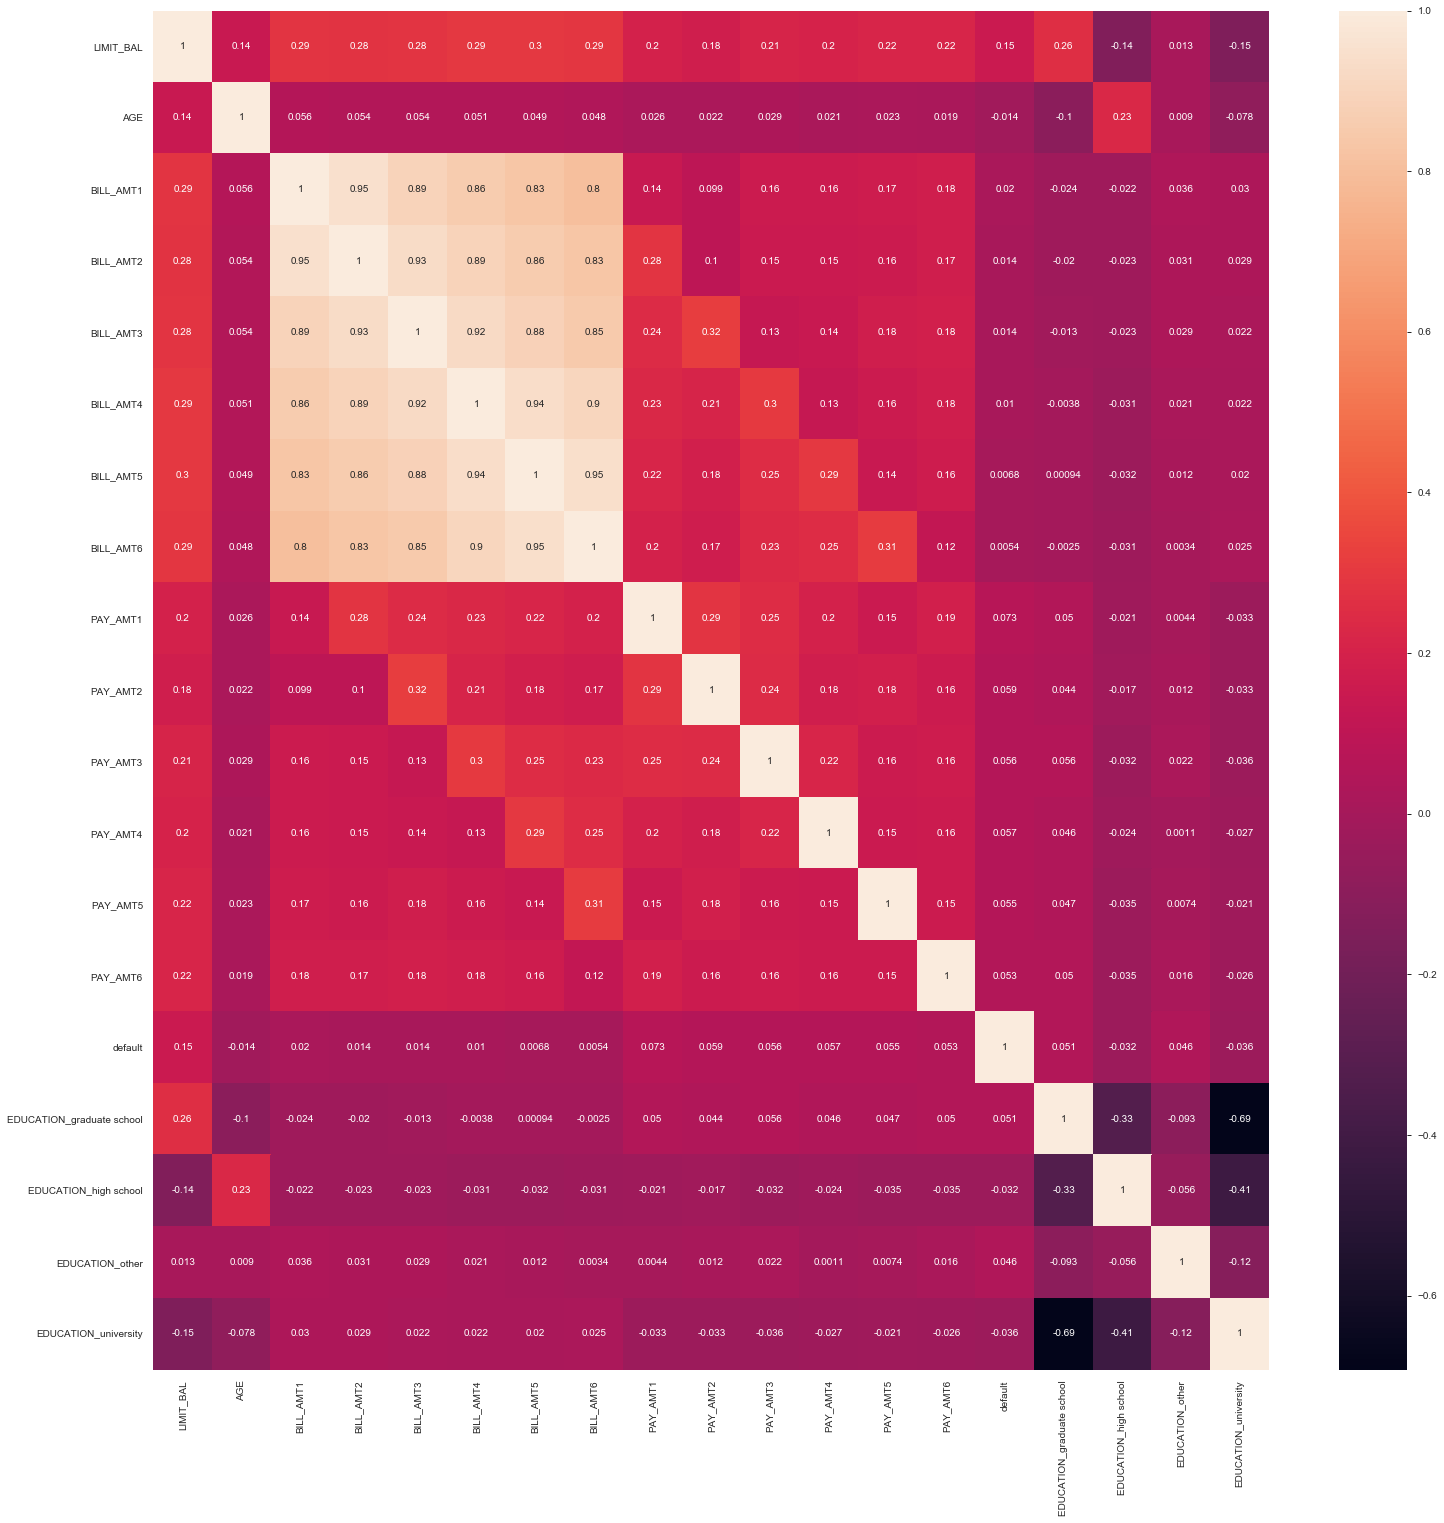

In [7]:
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sns.heatmap(credit_corr, annot=True)
plt.show()

In [7]:
X = credit.iloc[:,1:]
y = credit['LIMIT_BAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [8]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))
algosClass.append(('Logistics Regression',LogisticRegression()))
algosClass.append(('NaiveBayes',GaussianNB()))

In [10]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3)
    names.append(name)
    results.append(result)

/Users/sofyanovatskaya/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/Users/sofyanovatskaya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sofyanovatskaya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increa

In [11]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4603224673402953
Linear Regression 0.2554440219645377
Support Vector Regression -0.05029328809534713
Logistics Regression 0.07773333333333333
NaiveBayes 0.14806666666666668


# Discretization of dependent variable LIMIT BAL

In [12]:
df = credit
df['Credit_Bal_Bins'] = pd.cut(df.LIMIT_BAL,5,labels=['Bronze', 'Silver', 'Gold','Platinum', 'Titan'])
df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,Credit_Bal_Bins
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0,0,0,1,Bronze
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0,0,0,1,Bronze
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,1,Bronze
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,1,Bronze
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1,0,0,0,1,Bronze


In [8]:
credit = credit.drop(['LIMIT_BAL'], axis=1)
credit.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,Credit_Bal_Bins
0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0,0,0,1,Bronze
1,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0,0,0,1,Bronze
2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,1,Bronze
3,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,1,Bronze
4,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1,0,0,0,1,Bronze


In [9]:
le = LabelEncoder()
le.fit(credit['Credit_Bal_Bins'])
credit['Credit_Bal_Bins'] = le.transform(credit['Credit_Bal_Bins'])

In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
AGE                          30000 non-null int64
BILL_AMT1                    30000 non-null int64
BILL_AMT2                    30000 non-null int64
BILL_AMT3                    30000 non-null int64
BILL_AMT4                    30000 non-null int64
BILL_AMT5                    30000 non-null int64
BILL_AMT6                    30000 non-null int64
PAY_AMT1                     30000 non-null int64
PAY_AMT2                     30000 non-null int64
PAY_AMT3                     30000 non-null int64
PAY_AMT4                     30000 non-null int64
PAY_AMT5                     30000 non-null int64
PAY_AMT6                     30000 non-null int64
default                      30000 non-null int64
EDUCATION_graduate school    30000 non-null int64
EDUCATION_high school        30000 non-null int64
EDUCATION_other              30000 non-null int64
EDUCATION_university         30000 non-nu

In [10]:
X = credit.iloc[:,1:]
y = credit['Credit_Bal_Bins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

# Turn to the classification problem

In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [16]:
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3)
    names.append(name)
    results.append(result)

/Users/sofyanovatskaya/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/Users/sofyanovatskaya/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


In [17]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.9980666666666668
Decision Tree Classifier 0.9999666666666668


In [18]:
print(cross_val_score(model, X, y, cv=3)) 

[1.     1.     0.9999]


/Users/sofyanovatskaya/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


# CHOOSE A RIGHT MODEL

# RandomForestClassifier

In [19]:
algo = RandomForestClassifier(max_depth=100)
model = algo.fit(X_train, y_train)

In [20]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
print(model.score)

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


In [22]:
preds = model.predict(X_test)

In [23]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
accuracy_score(y_test, preds)

0.9985555555555555

In [34]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6133
           1       0.96      1.00      0.98       512
           2       1.00      0.21      0.34        24
           3       1.00      1.00      1.00      2331

    accuracy                           1.00      9000
   macro avg       0.99      0.80      0.83      9000
weighted avg       1.00      1.00      1.00      9000



In [35]:
print(cross_val_score(model, X, y, cv=3)) 

/Users/sofyanovatskaya/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


[0.9982 0.9987 0.9975]


# Support vector machine

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
svm_model = svm.SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(X_train,y_train)
predictions = svm_model.predict(X_test)
accuracy_score(predictions, y_test)

0.6951111111111111

In [13]:
scores = cross_val_score(svm_model, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.01)


In [18]:
print(svm_model.score)

<bound method ClassifierMixin.score of SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


# Making predictions

In [15]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[6132    1    0    0]
 [ 505    5    0    2]
 [  24    0    0    0]
 [2212    0    0  119]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      6133
           1       0.83      0.01      0.02       512
           2       0.00      0.00      0.00        24
           3       0.98      0.05      0.10      2331

    accuracy                           0.70      9000
   macro avg       0.63      0.27      0.23      9000
weighted avg       0.77      0.70      0.58      9000



/Users/sofyanovatskaya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


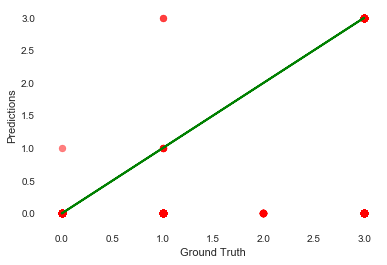

In [22]:
plt.scatter(y_test, predictions, color=['red'], alpha = 0.5)
plt.plot(y_test,y_test, color='green', linewidth=2)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();